<a href="https://colab.research.google.com/github/OscarRojasG/xdddddd/blob/main/Copia_de_Informe11_BellmanFord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema del camino más corto 

**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e$ asociado a cada arco $e\in E$.

**Salida**: La distancia más corta $dist(s,v)$ para cada vértice $v\in V$, o una declaración indicando que $G$ contiene un ciclo negativo.


# 2. Algoritmo de Bellman-Ford

## 2.1 Código

### Funciones auxiliares

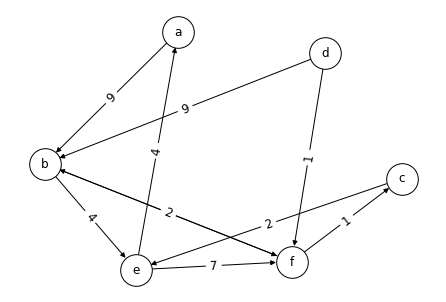

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import string
import random

def graph_instance_creator(n):
  graph = nx.gnp_random_graph(n, 0.25, 1, True)

  mapping = dict(zip(graph, string.ascii_lowercase))
  graph = nx.relabel_nodes(graph, mapping)

  weighted_edges = list()

  for e in graph.edges():
    weight = random.randint(1, 9)
    weighted_edges.append((e[0], e[1], weight))

  return create_graph(weighted_edges)

def create_graph(edges):
  graph = nx.DiGraph()
  graph.add_weighted_edges_from(edges)
  
  distances = dict()
  predecessors = dict()

  for n in graph.nodes():
    distances[n] = None
    predecessors[n] = None

  nx.set_node_attributes(graph, distances, 'distance')
  nx.set_node_attributes(graph, predecessors, 'predecessor')

  return graph

def draw_graph(G):
  weights = nx.get_edge_attributes(G, 'weight')

  pos = nx.spring_layout(G, k=4, seed=1)
  nx.draw(G, pos, with_labels=True, font_size=12, node_size=1000,
          node_color='white', edgecolors='black')
  
  nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_size=12)

  plt.show()
  plt.close()

G = graph_instance_creator(6)
draw_graph(G)

### Bellman-Ford

{'a': 0, 'b': 6, 'd': 5, 'e': 8, 'c': 9}


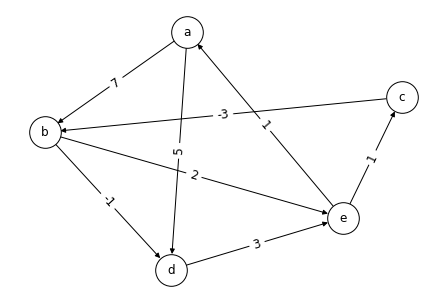

In [ ]:
from termcolor import colored
from math import inf

def bellman_ford(G, s):
  for n in G.nodes():
    # Inicializamos la distancia de 's' a cada nodo 'v' como infinito
    G.nodes[n]['distance'] = inf

  # Inicializamos el nodo de partida con distancia cero
  G.nodes[s]['distance'] = 0

  # Se recorren los arcos del grafo n-1 veces
  for i in range(len(G.nodes())):
    for e in G.edges():
      u, v = e[0], e[1]

      distance_u = G.nodes[u]['distance'] # Mínima distancia de 's' hasta 'u'
      distance_v = G.nodes[v]['distance'] # Miníma distancia de 's' hasta 'v'
      weight = G[u][v]['weight'] # Distancia de 'u' hasta 'v'

      # Se calcula la nueva distancia a 'v' y si es menor se actualiza
      if (distance_u + weight) < distance_v:
        G.nodes[v]['distance'] = distance_u + weight
        G.nodes[v]['predecessor'] = u

  # Se vuelven a recorrer los arcos para revisar si existen ciclos negativos
  for e in G.edges():
    u, v = e[0], e[1]

    distance_u = G.nodes[u]['distance'] # Mínima distancia de 's' hasta 'u'
    distance_v = G.nodes[v]['distance'] # Miníma distancia de 's' hasta 'v'
    weight = G[u][v]['weight'] # Distancia de 'u' hasta 'v'

    if (distance_u + weight) < distance_v:
      return False # Retornamos False para indicar que existe un ciclo negativo

  distances = nx.get_node_attributes(G, 'distance')
  return distances

edges = [
  ('s', 't', 6),
  ('s', 'y', 7),
  ('t', 'x', 5),
  ('t', 'y', 8),
  ('t', 'z', -4),
  ('x', 't', -2),
  ('y', 'x', -3),
  ('y', 'z', 9),
  ('z', 's', 2),
  ('z', 'x', 7)
]

edges = [
  ('a', 'b', 7),
  ('a', 'd', 5),
  ('b', 'd', -1),
  ('b', 'e', 2),
  ('c', 'b', -3),
  ('d', 'e', 3),
  ('e', 'c', 1),
  ('e', 'a', 1)
]

G = create_graph(edges)
distances = bellman_ford(G, 'a')
print(distances)
draw_graph(G)

## 2.2. Descripción del algoritmo

La entrada consiste en un grafo dirigido $G$ con $n$ vértices, donde cada arco posee un peso asignado (distancia), más un nodo $s$ que corresponde al punto de partida. Si no existen ciclos negativos, el algoritmo retorna un diccionario con la distancia mínima que existe entre el nodo inicial y el resto de nodos del grafo. En caso contrario, el algoritmo retorna `False`, indicando que no fue posible calcular todas las distancias. Los pasos realizados son los siguientes:

1. Se crea un diccionario para guardar la distancia mínima de $s$ al resto de nodos, inicializando sus valores en infinito.

2. Asignamos al nodo $s$ una distancia de 0, puesto que corresponde al nodo inicial.

3. Iteramos $n-1$ veces por todos los arcos del grafo.

4. Para cada arco $(u, v)$, calculamos la distancia de $s$ a $v$ como $\text{dist}(s, v) = \text{dist}(s, u) + w(u, v)$, donde $w(u, v)$ corresponde al peso del arco $(u, v)$.

5. Si la distancia calculada en el paso anterior es menor a la actual, actualizamos su valor.

6. Al finalizar las iteraciones, realizamos una última iteración adicional para verificar que no existan ciclos negativos. Si para cualquier arco $(u, v)$ obtenemos una distancia menor a las previamente calculadas, retornamos `False`.

7. Si no existen ciclos negativos, retornamos el diccionario con las distancias obtenidas.


## 2.3 Ejemplo

Consideremos el siguiente grafo:

![image](https://drive.google.com/uc?export=view&id=1Bq5ZikIz5KguWFfz40xn3hlCdk5UJsCS)

En primer lugar, inicializamos la distancia de cada vértice del grafo, considerando como punto de partida el nodo $a$:

![image](https://drive.google.com/uc?export=view&id=1-zRKu-A7F4hEQt6QfBpdhCvK2Nx502Go)

Luego, iteramos por cada uno de los arcos del grafo. Para este ejemplo, asumiremos que los arcos se recorren en orden alfabético.

Al pasar por el arco $(a, b)$, calculamos el valor de la distancia para el nodo de llegada.

$\text{dist}(a, b) = \text{dist}(a, a) + w(a, b) = 0 + 7 = 7$

Como $7 < ∞$, actualizamos el valor de la distancia. Repetimos este paso para el arco $(a, d)$

![image](https://drive.google.com/uc?export=view&id=1PBOlCH8guu21lOPgJh4v1_tYRUM1GrMX)

Continuamos con el arco $(b, d)$. En este caso, notamos que al calcular la distancia, obtenemos un valor mayor al previamente guardado.

$\text{dist}(b, d) = \text{dist}(a, b) + w(b, d) = 7 + (-1) = 6$

Como $5 > 6$, mantenemos el valor anterior.

![image](https://drive.google.com/uc?export=view&id=1-yW5TZvKikDAVSHFGfTpKw_-9lE-0Yzz)

Repetimos este paso para el resto de arcos del grafo:

![image](https://drive.google.com/uc?export=view&id=1nP6kV-Yn_BWtlR7vtbcozg2-hBrPnuEi)

![image](https://drive.google.com/uc?export=view&id=1p8zb92Iv9ycguorJN-LcbYFR_pOCKK8y)

![image](https://drive.google.com/uc?export=view&id=1P0jgm17oaRdHE7LH8XAnUNzfQmvWp-vC)

Al finalizar la primera iteración, obtenemos las siguientes distancias:

![image](https://drive.google.com/uc?export=view&id=1k8I_akpIxGIfmEfBtiHZKhGZ3IXSNea7)

En la siguiente iteración, actualizamos los valores que sean necesarios:

![image](https://drive.google.com/uc?export=view&id=1kN7wJRuVuxWTV1jVNJYypjV2uPDaXt_R)

Continuamos iterando hasta completar las $n-1$ iteraciones, o convenientemente hasta que no ocurran más cambios. Finalmente, retornamos las distancias obtenidas:

![image](https://drive.google.com/uc?export=view&id=1VzjsfglA-w14Ht4uOapnLPpeXDzWHxfa)






## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada paso del algoritmo:

# 3. Correctitud

### **Teorema 1: Correctitud del algoritmo Bellman-Ford**

*Correctitud*

## Prueba del Teorema

### Hipótesis inductiva

*Hipótesis*

### Prueba por inducción

**Caso base**

**Paso inductivo**

# 4. Tiempo de ejecución

### **Teorema 2: Tiempo de ejecución del algoritmo Bellman-Ford**

*Teorema*



# 5. Experimentos

## 5.1 Experimento 1

### Análisis de resultados

## 5.2 Experimento 2

### Análisis de resultados